In [ ]:
# Pertemuan 2 Pengolahan citra digital

/tmp/ipykernel_12876/1562756460.py:25: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


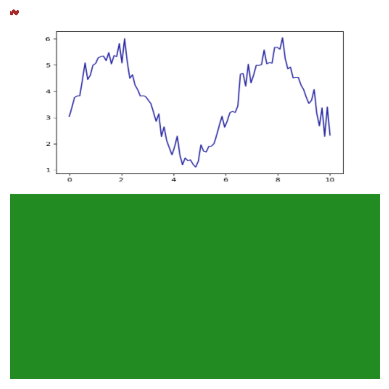

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Generate mountain range data
x = np.linspace(0, 10, 100)
y = np.sin(x) * 2 + np.abs(np.random.normal(scale=0.5, size=x.shape)) + 3  # Simulated mountain range

# Create the figure and plot
fig, ax = plt.subplots()
ax.plot(x, y, color='brown')

# Add a background for sky and ground using OpenCV
# Create a canvas of 500x500 pixels
canvas = np.zeros((500, 500, 3), dtype="uint8")

# Color the top part of the image (sky)
canvas[:250] = (135, 206, 235)  # Sky blue

# Color the bottom part of the image (ground)
canvas[250:] = (34, 139, 34)  # Forest green

# Convert the matplotlib plot to an image
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

# Resize the plot image to fit in the canvas
plot_resized = cv2.resize(image, (500, 250))

# Place the plot in the sky portion of the canvas
canvas[:250] = plot_resized

# Convert from BGR to RGB for displaying in matplotlib
canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

# Display the final image
plt.imshow(canvas_rgb)
plt.axis('off')  # Hide axes for a cleaner image
plt.show()


In [ ]:
import cv2
from cv2 import typing

citra: typing.MatLike = cv2.imread('taka.jpeg')

cv2.imshow('Taka', citra)
cv2.waitKey(0)

In [5]:
import cv2
from cv2 import typing

citra: typing.MatLike = cv2.imread('taka.jpeg')
citra.shape

image_gray = cv2.cvtColor(citra, cv2.COLOR_GRAY2BGR)

cv2.imshow('Taka Gray', image_gray)
cv2.waitKey(0)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


In [6]:
# Person detection

hog = cv2.HOGDescriptor()
hog.setSVMDetector(
  cv2.HOGDescriptor_getDefaultPeopleDetector()
)

image = cv2.imread('taka.jpeg')

(rects, weights) = hog.detectMultiScale(
  image, winStride=(4, 4), padding=(8, 8), scale=1.05
)

for (x, y, w, h) in rects:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow("Person Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/habi/Dev/githubRepos/learn-image-processing/.venv/lib/python3.11/site-packages/cv2/qt/plugins"


233

: 

In [1]:
# Change skin

import numpy as np
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(
  cv2.HOGDescriptor_getDefaultPeopleDetector()
)

image = cv2.imread('taka.jpeg')

(rects, weights) = hog.detectMultiScale(
  image, winStride=(4, 4), padding=(8, 8), scale=1.05
)

for (x, y, w, h) in rects:
  person_roi = image[y:y+h, x:x+w]

  hsv = cv2.cvtColor(person_roi, cv2.COLOR_BGR2HSV)

  lower_skin = np.array([0, 20, 70], dtype=np.uint8)
  upper_skin = np.array([20, 255, 255], dtype=np.uint8)

  skin_mask = cv2.inRange(hsv, lower_skin, upper_skin)

  hsv[skin_mask > 0, 2] = hsv[skin_mask > 0, 2] * 0.5

  modified_person_roi = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

  image[y:y+h, x:x+w] = modified_person_roi

cv2.imshow("Modified Skin Tone", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/habi/Dev/githubRepos/learn-image-processing/.venv/lib/python3.11/site-packages/cv2/qt/plugins"
